<a href="https://colab.research.google.com/github/KELONMYOSA/x5rating-backend/blob/main/bootcamp_hack_load_and_preproccess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install clickhouse-connect

In [3]:
!pip install pyLDAvis

In [4]:
import clickhouse_connect

client = clickhouse_connect.get_client(host='81.200.148.178',
                                       username='champs', password='champs123')

In [9]:
import pandas as pd

In [10]:
result = client.query('SELECT * FROM ymaps_shops')
df_shops = pd.DataFrame(result.result_rows)

In [11]:
def column_to_columns(df: pd.DataFrame, col: str) -> pd.DataFrame:
    data = pd.json_normalize(df[col])
    keys = [f'{col}_{key}' for key in data.columns]
    df[keys] = data
    return df

def columns_to_unwrap(df: pd.DataFrame, cols: list) -> pd.DataFrame:
    for col in cols:
        df = column_to_columns(df, col)
    return df

In [12]:
df_shops.columns = ['id', 'title', 'coordinates', 'address', 'rating', 'working_hours', 'metro', 'stops',
              'chain', 'features', 'aspects']
cols_to_unwrap = ['address', 'rating', 'chain']
df_shops = columns_to_unwrap(df_shops, cols_to_unwrap)

In [13]:
df_shops.head()

,id,title,coordinates,address,rating,working_hours,metro,stops,chain,features,...,address_locality,address_street,address_house,address_area,rating_ratingCount,rating_ratingValue,rating_reviewCount,chain_id,chain_name,chain_quantityInCity
0,1001360104,Перекресток,"[37.585667, 55.852607]","{'country': 'Россия', 'locality': 'Москва', 's...","{'ratingCount': 1598.0, 'ratingValue': 4.40000...","ежедневно, 08:00–23:00","[{'id': 'station__9858799', 'name': 'Владыкино...","[{'id': 'stop__9647131', 'name': 'Алтуфьевское...","{'id': '6002404', 'name': 'Супермаркет Перекрё...","[{'id': 'food_product_delivery', 'name': 'дост...",...,Москва,Алтуфьевское шоссе,8,NaN,1598.0,4.4,504.0,6002404,Супермаркет Перекрёсток,302
1,1001697690,Дикси,"[30.357889, 59.946321]","{'country': 'Россия', 'locality': 'Санкт-Петер...","{'ratingCount': 798.0, 'ratingValue': 3.900000...","ежедневно, круглосуточно","[{'id': 'station__9805917', 'name': 'Чернышевс...","[{'id': 'stop__10073304', 'name': 'Проспект Че...","{'id': '6003375', 'name': 'Дикси', 'quantityIn...","[{'id': 'food_product_delivery', 'name': 'дост...",...,Санкт-Петербург,улица Чайковского,55,NaN,798.0,3.9,271.0,6003375,Дикси,294
2,1002469537,О'кей,"[30.622659, 59.739226]","{'country': 'Россия', 'area': 'Колпинский райо...","{'ratingCount': 8340.0, 'ratingValue': 4.90000...","ежедневно, 09:00–23:00",[],"[{'id': 'stop__10071423', 'name': 'Октябрьская...","{'id': '439598482', 'name': 'О'КЕЙ, гипермарке...","[{'id': 'payment_by_credit_card', 'name': 'опл...",...,Колпино,Октябрьская улица,8,Колпинский район,8340.0,4.9,1746.0,439598482,"О'КЕЙ, гипермаркеты",1
3,1005579468,Перекрёсток,"[37.659366, 55.756499]","{'country': 'Россия', 'locality': 'Москва', 's...","{'ratingCount': 2369.0, 'ratingValue': 4.30000...","ежедневно, круглосуточно","[{'id': 'station__9858944', 'name': 'Чкаловска...","[{'id': 'stop__9649588', 'name': 'Курский вокз...","{'id': '6002404', 'name': 'Супермаркет Перекрё...","[{'id': 'food_product_delivery', 'name': 'дост...",...,Москва,улица Земляной Вал,33,NaN,2369.0,4.3,596.0,6002404,Супермаркет Перекрёсток,302
4,1006026708,Усачёвский рынок,"[37.567781, 55.727567]","{'country': 'Россия', 'locality': 'Москва', 's...","{'ratingCount': 29234.0, 'ratingValue': 5.0, '...","пн-чт 08:00–22:00; пт,сб 08:00–23:00; вс 08:00...","[{'id': 'station__9858909', 'name': 'Спортивна...","[{'id': 'stop__9644286', 'name': 'Абрикосовски...",{},"[{'id': 'food_product_delivery', 'name': 'дост...",...,Москва,Усачёва улица,26,NaN,29234.0,5.0,8402.0,NaN,NaN,NaN


In [14]:
df_shops.columns


Index(['id', 'title', 'coordinates', 'address', 'rating', 'working_hours',
       'metro', 'stops', 'chain', 'features', 'aspects', 'address_country',
       'address_locality', 'address_street', 'address_house', 'address_area',
       'rating_ratingCount', 'rating_ratingValue', 'rating_reviewCount',
       'chain_id', 'chain_name', 'chain_quantityInCity'],
      dtype='object')

In [15]:
result = client.query('SELECT * FROM ymaps_reviews')
df_reviews = pd.DataFrame(result.result_rows)
df_reviews.shape

(458968, 10)

In [16]:
df_reviews.columns = ['review_id', 'business_id', 'user_id', 'user_level',
                     'time', 'rating', 'likes', 'dislikes', 'language', 'text']

In [17]:
df_reviews

,review_id,business_id,user_id,user_level,time,rating,likes,dislikes,language,text
0,---lrMICWU-AyoDa218IhvsHgkBWwk,1016276571,m5uwwbe0pfyu7g5uxcceeb2z08,Знаток города 10 уровня,2023-03-19 15:10:39,5,3,0,ru,Всё хорошо 👍
1,---xwwd5MRtVxSkUda2NfAWuVEGnra,1244671383,kgdm3y1wud5rhf58paek5dgqk4,Знаток города 6 уровня,2019-10-15 22:17:10,5,5,0,unknown,"Хороший, немаленький супермаркет Бесплатная ..."
2,---zS1nETIPXk4bx0ZDHjCpaMf9KDH,49508116938,93qcpfq2hm5cf6fg09wv4q9n1m,Знаток города 6 уровня,2020-04-24 08:20:36,1,3,3,unknown,"Я, у них спросила цену, они начели мне хомить,..."
3,--0iZ2JReyvP44K4Sml0TI3C0i9Rw-Eo,1107673873,u5eprkazm5w2ex3bek8butbvj8,Знаток города 8 уровня,2021-12-10 08:46:35,5,1,2,unknown,Всё хорошо и цени и продуктов всё ок
4,--14gymVtYAH3QL5Xx0YgZVS91hLQj,1296991140,c0tr5m93kdkevt4j43yv04y9rg,Знаток города 30 уровня,2019-12-28 10:45:11,5,4,0,unknown,"Ассортимент маловат, но магазин неплохой. Пост..."
...,...,...,...,...,...,...,...,...,...,...
458963,zu8cD9KKVK75eSYcS8nY8TTsvKAcmJa,1096396166,60qjv4pd7a14pf0hje0ak1vr4w,Знаток города 19 уровня,2022-06-03 16:36:04,5,1,0,unknown,"Хороший магазин, хороший выбор продуктов)) ="
458964,zuCVjOEkzj-q-VNo0KajTG-s8ot1-Am,1158436596,hcaer28qwmdn87p0b9n0pptpkr,Знаток города 14 уровня,2021-02-27 03:24:59,3,1,0,unknown,"Недавно сделали ремонт, расширили пространство..."
458965,zwpm-q07OVZSr3CAG_nVVCJCrL3suMY4d,236748736583,q4tzdxgb61ccu5qc9e4mp8u3cw,Знаток города 5 уровня,2022-09-13 05:56:25,5,2,0,unknown,Приятный магазинчик. Все необходимое есть.
458966,zy3uY9aKeu9VTTol2ntE2CatK-wAWDCc,1096396166,b3gab0q2enr1rn0uepbd0w12dg,Знаток города 3 уровня,2023-03-20 08:00:42,5,3,0,ru,Великолепная кухня


In [16]:
df_reviews.time.dt.year.value_counts()

time
2022    110626
2023    110429
2021     92838
2019     68679
2020     65138
2018     10985
2017       147
2016        78
2015        18
2014        16
2013        11
2012         3
Name: count, dtype: int64

In [ ]:
!pip install nltk

In [ ]:
# Step 2: Import necessary libraries
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Step 3: Download the necessary resources for NLTK (if not already downloaded)
nltk.download('vader_lexicon')

In [40]:
# Step 4: Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Step 5: Define a function to get sentiment scores for each review
def get_sentiment(text):
    return analyzer.polarity_scores(text)['compound']

# Step 6: Apply sentiment analysis to the reviews
df_reviews['sentiment'] = df_reviews['text'].apply(get_sentiment)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


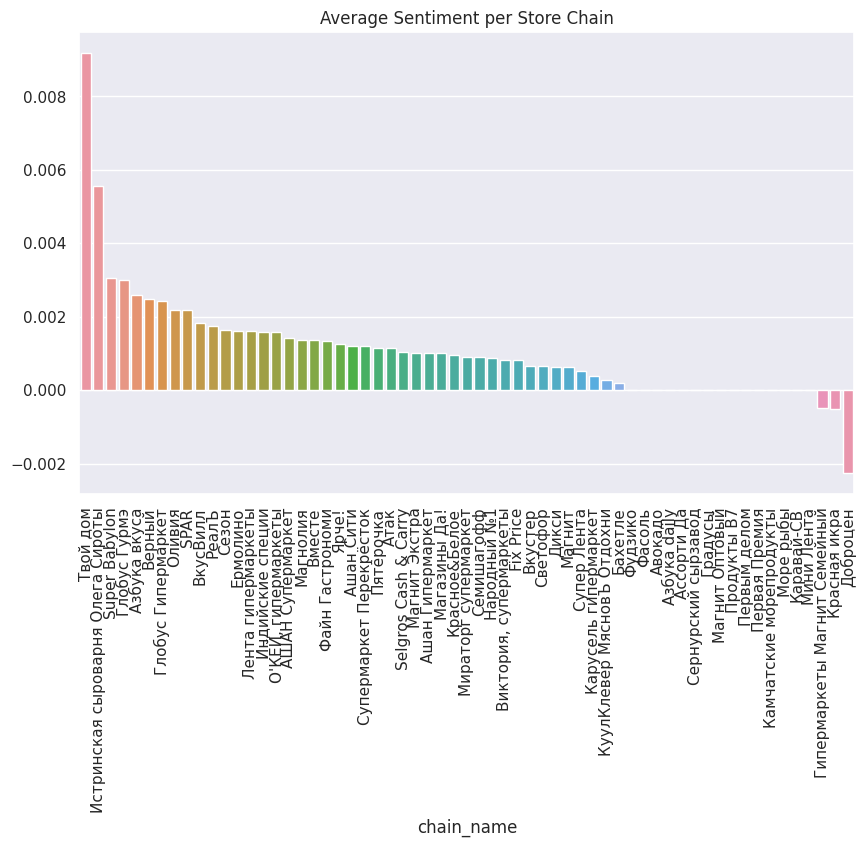

In [41]:


# Continue with the rest of the code as previously provided (visualization, merging, etc.)

# Step 6: Visualize the sentiment distribution for store chains

# Assuming you have already performed sentiment analysis and have sentiment scores in the 'sentiment' column of df_reviews.

# Merge the sentiment information with the DataFrame containing shop information
merged_df = pd.merge(df_shops, df_reviews, left_on='id', right_on='business_id', how='inner')

# Calculate the average sentiment per shop chain
average_sentiment_per_chain = merged_df.groupby('chain_name')['sentiment'].mean().sort_values(ascending=False)

# Visualize the sentiment distribution for store chains
plt.figure(figsize=(10, 6))
sns.barplot(x=average_sentiment_per_chain.index, y=average_sentiment_per_chain.values)
plt.xticks(rotation=90)
plt.title('Average Sentiment per Store Chain')
plt.show()


# Step 9: Make recommendations based on sentiment analysis
# You can use the sentiment scores to recommend shops with more positive sentiment in their reviews.

# Note: This code uses lemmatization and sentiment analysis specific to the Russian language. Depending on your specific needs, you may want to explore other libraries or techniques for sentiment analysis in Russian.


In [51]:
# Show unique values in the 'chain_name' column
unique_chain_names = df_shops['chain_name'].unique()
print(unique_chain_names)


['Супермаркет Перекрёсток' 'Дикси' "О'КЕЙ, гипермаркеты" nan
 'Азбука вкуса' 'Магнолия' 'Лента гипермаркеты' 'Пятёрочка' 'РеалЪ'
 'Бахетле' 'АШАН Супермаркет' 'Ашан Гипермаркет' 'Магнит' 'Ашан Сити'
 'Глобус Гипермаркет' 'Мираторг супермаркет' 'Атак' 'Сезон' 'Супер Лента'
 'Магнит Экстра' 'Selgros Cash & Carry' 'Народный №1' 'Глобус Гурмэ'
 'Верный' 'Индийские специи' 'Виктория, супермаркеты' 'Super Babylon'
 'ВкусВилл' 'Оливия' 'Семишагофф' 'КуулКлевер МясновЪ Отдохни'
 'Красная икра' 'Твой дом' 'Первая Премия' 'Море рыбы'
 'Гипермаркеты Магнит Семейный' 'Магазины Да!' 'Вместе' 'Градусы' 'SPAR'
 'Светофор' 'Вкустер' 'Ярче!' 'Fix Price' 'Ассорти Да' 'Магнит Оптовый'
 'Камчатские морепродукты' 'Красное&Белое'
 'Истринская сыроварня Олега Сироты' 'Азбука daily' 'Фасоль' 'Ермолино'
 'Фудзико' 'Мини Лента' 'Файн Гастрономи' 'Каравай-СВ'
 'Сернурский сырзавод' 'Доброцен' 'Авокадо' 'Карусель гипермаркет'
 'Первым делом' 'Продукты В7']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
# Step 9: Make recommendations based on sentiment analysis for store chains

# Assuming you have already performed sentiment analysis and have sentiment scores in the 'sentiment' column of df_reviews.

# Merge the sentiment information with the DataFrame containing shop information
merged_df = pd.merge(df_shops, df_reviews, left_on='id', right_on='business_id', how='inner')

# Calculate the average sentiment per shop chain
average_sentiment_per_chain = merged_df.groupby('chain_name')['sentiment'].mean().sort_values(ascending=False)

# Get the chains with the highest average sentiment
top_chains_by_sentiment = average_sentiment_per_chain.head(5)  # Change '5' to the desired number of top chains

# Display the top recommended chains
print("Top Recommended Chains based on Sentiment Analysis:")
for chain, sentiment in top_chains_by_sentiment.items():
    print(f"Chain: {chain} - Average Sentiment: {sentiment:.2f}")

# Note: You can adjust the number of top chains based on your specific criteria and requirements.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top Recommended Chains based on Sentiment Analysis:
Chain: Твой дом - Average Sentiment: 0.01
Chain: Истринская сыроварня Олега Сироты - Average Sentiment: 0.01
Chain: Super Babylon - Average Sentiment: 0.00
Chain: Глобус Гурмэ - Average Sentiment: 0.00
Chain: Азбука вкуса - Average Sentiment: 0.00


To analyze the "fiveorochka" chain according to city regions and find out where it performs better, you'll need to follow these steps:



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


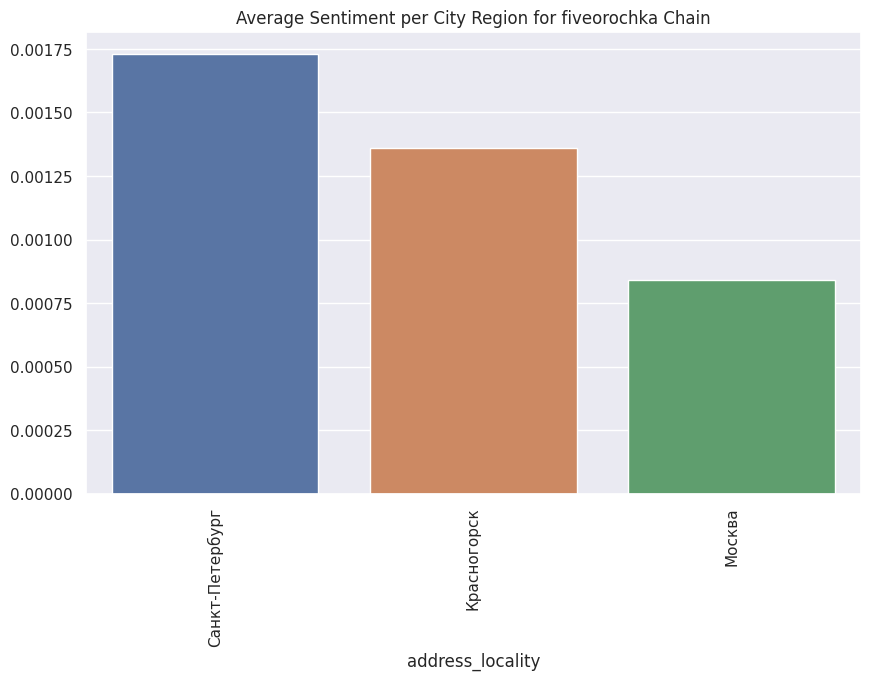

In [49]:
# Step 1: Filter data for the "fiveorochka" chain
# fiveorochka_chain = df_shops[df_shops['chain_name'] == 'Пятерочка'  df_shops['chain_name'] == 'Пятёрочка']
fiveorochka_chain = df_shops[df_shops['chain_name'].isin(['Пятерочка', 'Пятёрочка'])]

# Step 2: Merge the sentiment information with the DataFrame containing shop information
merged_df = pd.merge(fiveorochka_chain, df_reviews, left_on='id', right_on='business_id', how='inner')

# Step 3: Calculate the average sentiment per city region
average_sentiment_per_region = merged_df.groupby('address_locality')['sentiment'].mean().sort_values(ascending=False)

# Step 4: Visualize the sentiment distribution per city region
plt.figure(figsize=(10, 6))
sns.barplot(x=average_sentiment_per_region.index, y=average_sentiment_per_region.values)
plt.xticks(rotation=90)
plt.title('Average Sentiment per City Region for fiveorochka Chain')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


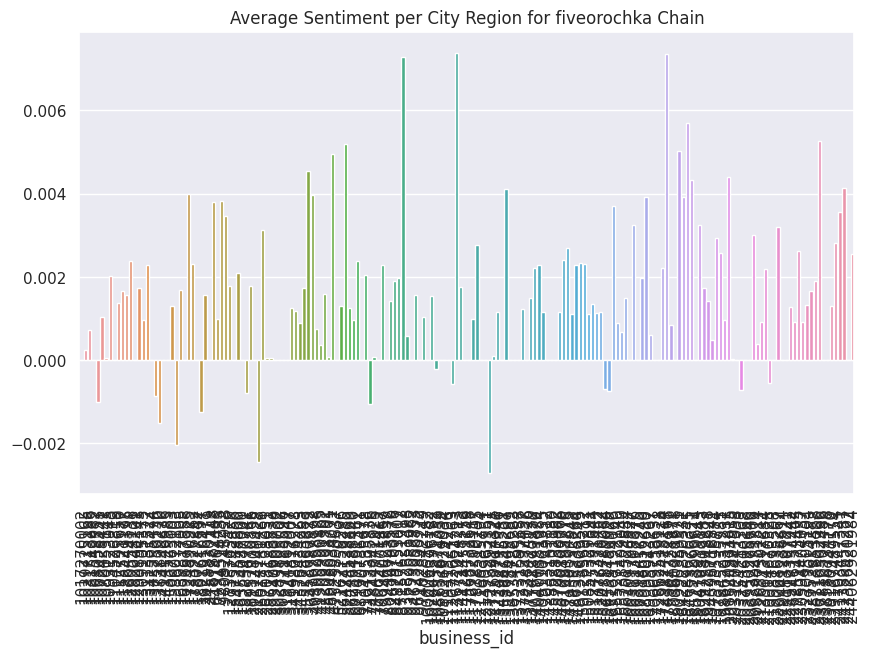

In [50]:
# Step 1: Filter data for the "fiveorochka" chain
# fiveorochka_chain = df_shops[df_shops['chain_name'] == 'Пятерочка'  df_shops['chain_name'] == 'Пятёрочка']
fiveorochka_chain = df_shops[df_shops['chain_name'].isin(['Пятерочка', 'Пятёрочка'])]

# Step 2: Merge the sentiment information with the DataFrame containing shop information
merged_df = pd.merge(fiveorochka_chain, df_reviews, left_on='id', right_on='business_id', how='inner')

# Step 3: Calculate the average sentiment per city region
average_sentiment_per_region = merged_df.groupby('business_id')['sentiment'].mean().sort_values(ascending=False)

# Step 4: Visualize the sentiment distribution per city region
plt.figure(figsize=(10, 6))
sns.barplot(x=average_sentiment_per_region.index, y=average_sentiment_per_region.values)
plt.xticks(rotation=90)
plt.title('Average Sentiment per City Region for fiveorochka Chain')
plt.show()


In [52]:
# Step 1: Identify the "fiveorochka" shop
fiveorochka_shop = df_shops[df_shops['chain_name'] == 'Пятёрочка']

# Step 2: Filter reviews for the "fiveorochlka" shop
fiveorochka_reviews = df_reviews[df_reviews['business_id'].isin(fiveorochka_shop['id'])]


# Step 3: Show reviews statistics for the "fiveorochlka" shop
print(f"Statistics for 'fiveorochlka' shop:")
print(f"Total Reviews: {len(fiveorochka_reviews)}")
print(f"Average Rating: {fiveorochka_reviews['rating'].mean():.2f}")
print(f"Average Sentiment: {fiveorochka_reviews['sentiment'].mean():.2f}")

# Step 4: Get the 5 nearest chain competitors
nearest_chains = ['Супермаркет Перекрёсток', 'Ашан Гипермаркет', 'Ашан Сити', 'Ярче!', 'Атак', 'Магазины Да!', 'Selgros Cash & Carry', 'Магнит Экстра']

# Step 5: Filter reviews for the nearest chain competitors
nearest_chain_reviews = df_reviews[df_reviews['business_id'].isin(df_shops[df_shops['chain_name'].isin(nearest_chains)]['id'])]

# Step 6: Show reviews statistics for the nearest chain competitors
print("\nStatistics for nearest chain competitors:")
for chain_name in nearest_chains:
    chain_reviews = nearest_chain_reviews[nearest_chain_reviews['business_id'].isin(df_shops[df_shops['chain_name'] == chain_name]['id'])]
    print(f"\nChain: {chain_name}")
    print(f"Total Reviews: {len(chain_reviews)}")
    print(f"Average Rating: {chain_reviews['rating'].mean():.2f}")
    print(f"Average Sentiment: {chain_reviews['sentiment'].mean():.2f}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Statistics for 'fiveorochlka' shop:
Total Reviews: 72089
Average Rating: 3.81
Average Sentiment: 0.00

Statistics for nearest chain competitors:

Chain: Супермаркет Перекрёсток
Total Reviews: 66391
Average Rating: 4.06
Average Sentiment: 0.00

Chain: Ашан Гипермаркет
Total Reviews: 17551
Average Rating: 4.19
Average Sentiment: 0.00

Chain: Ашан Сити
Total Reviews: 5856
Average Rating: 4.05
Average Sentiment: 0.00

Chain: Ярче!
Total Reviews: 1685
Average Rating: 4.39
Average Sentiment: 0.00

Chain: Атак
Total Reviews: 4107
Average Rating: 3.94
Average Sentiment: 0.00

Chain: Магазины Да!
Total Reviews: 7826
Average Rating: 4.52
Average Sentiment: 0.00

Chain: Selgros Cash & Carry
Total Reviews: 3450
Average Rating: 4.28
Average Sentiment: 0.00

Chain: Магнит Экстра
Total Reviews: 2269
Average Rating: 4.18
Average Sentiment: 0.00


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


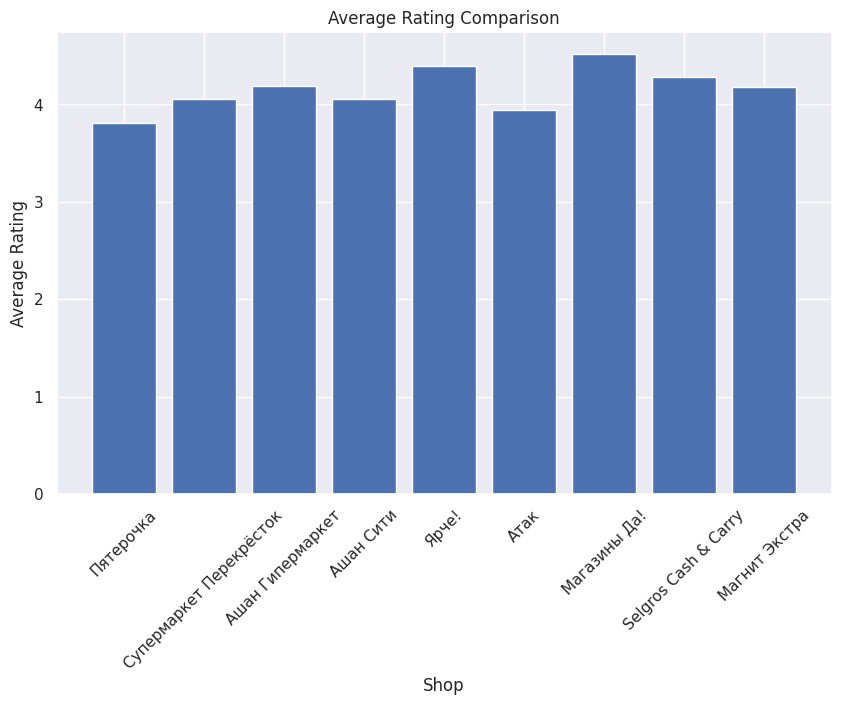

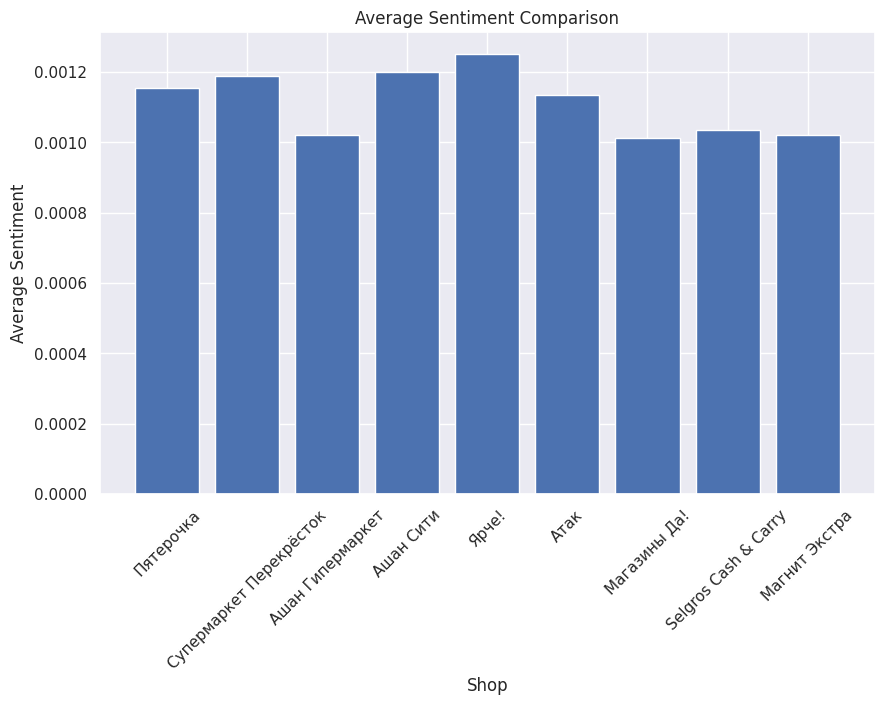

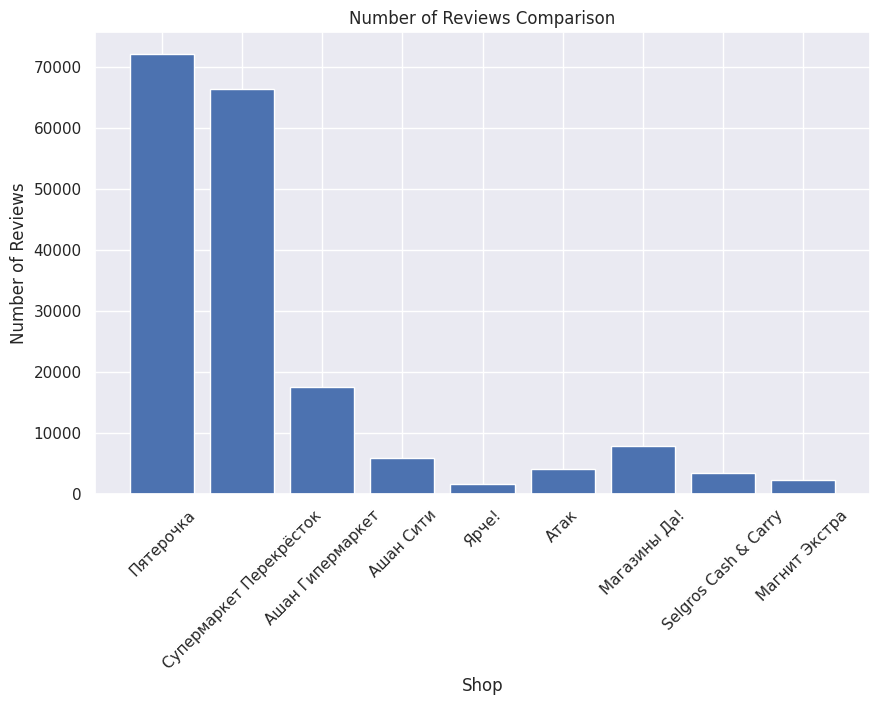

In [54]:
import matplotlib.pyplot as plt
# Step 7: Create graphs

# Ratings Comparison
plt.figure(figsize=(10, 6))
plt.bar(['Пятерочка'] + nearest_chains,
        [fiveorochka_reviews['rating'].mean()] +
        [nearest_chain_reviews[nearest_chain_reviews['business_id'].isin(df_shops[df_shops['chain_name'] == chain_name]['id'])]['rating'].mean() for chain_name in nearest_chains])
plt.xlabel('Shop')
plt.ylabel('Average Rating')
plt.title('Average Rating Comparison')
plt.xticks(rotation=45)
plt.show()

# Sentiment Comparison
plt.figure(figsize=(10, 6))
plt.bar(['Пятерочка'] + nearest_chains,
        [fiveorochka_reviews['sentiment'].mean()] +
        [nearest_chain_reviews[nearest_chain_reviews['business_id'].isin(df_shops[df_shops['chain_name'] == chain_name]['id'])]['sentiment'].mean() for chain_name in nearest_chains])
plt.xlabel('Shop')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment Comparison')
plt.xticks(rotation=45)
plt.show()

# Review Count Comparison
plt.figure(figsize=(10, 6))
plt.bar(['Пятерочка'] + nearest_chains,
        [len(fiveorochka_reviews)] +
        [len(nearest_chain_reviews[nearest_chain_reviews['business_id'].isin(df_shops[df_shops['chain_name'] == chain_name]['id'])]) for chain_name in nearest_chains])
plt.xlabel('Shop')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews Comparison')
plt.xticks(rotation=45)
plt.show()


main tags

can you also recommend a way to extract tags from reviews, for example "bad personal" or"always fresh vegetables"  according to "text" column in df_reviews table



In [17]:
!pip install spacy


In [21]:
!python -m spacy download ru_core_news_sm


2023-09-08 13:49:21.515778: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-08 13:49:23.156214: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-09-08 13:49:26.936487: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-08 13:49:26.938383: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

In [23]:
pip install --upgrade spacy

In [24]:

pip install --upgrade numpy

In [18]:
import spacy

# Load the spaCy model for Russian
nlp = spacy.load("ru_core_news_sm")

# Define a function to extract tags from a text
# def extract_tags(text):
#     doc = nlp(text)
#     tags = [chunk.text for chunk in doc.noun_chunks if len(chunk.text.split()) > 1]  # Extract noun phrases
#     return tags
# def extract_tags(text):
#     tags = []
#     if 'bad personal' in text:
#         tags.append('bad personal')
#     if 'always fresh vegetables' in text:
#         tags.append('always fresh vegetables')
#     # Add more tag checks as needed
#     return tags


# # Apply the function to the "text" column in df_reviews
# df_reviews['tags'] = df_reviews['text'].apply(extract_tags)

# # Display the resulting DataFrame
# print(df_reviews[['text', 'tags']])


                                                     text tags
0                                           Всё хорошо 👍    []
1       Хороший,  немаленький супермаркет  Бесплатная ...   []
2       Я, у них спросила цену, они начели мне хомить,...   []
3                    Всё хорошо и цени и продуктов всё ок   []
4       Ассортимент маловат, но магазин неплохой. Пост...   []
...                                                   ...  ...
458963       Хороший магазин, хороший выбор продуктов)) =   []
458964  Недавно сделали ремонт, расширили пространство...   []
458965        Приятный магазинчик. Все необходимое есть.    []
458966                                Великолепная кухня    []
458967  В продаже попадаются продукты с вышедшим сроко...   []

[458968 rows x 2 columns]


In [20]:
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities


In [ ]:
# Assuming df_reviews is your DataFrame
df_reviews['entities'] = df_reviews['text'].apply(extract_entities)


In [ ]:
print(df_reviews[['text', 'entities']])
